## Customer Airline Sactisfaction Data set from Kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
df.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [5]:
df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                              True
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

### Dealing with missing value
<ol>
    <li>Arrival Delay</li>
</ol>

In [6]:
df['Arrival Delay']

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [7]:
df['Arrival Delay'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

In [8]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mode()[0], inplace=True)

In [9]:
df['Arrival Delay'].isnull().any()

False

In [10]:
df.isnull().any()

ID                                        False
Gender                                    False
Age                                       False
Customer Type                             False
Type of Travel                            False
Class                                     False
Flight Distance                           False
Departure Delay                           False
Arrival Delay                             False
Departure and Arrival Time Convenience    False
Ease of Online Booking                    False
Check-in Service                          False
Online Boarding                           False
Gate Location                             False
On-board Service                          False
Seat Comfort                              False
Leg Room Service                          False
Cleanliness                               False
Food and Drink                            False
In-flight Service                         False
In-flight Wifi Service                  

In [11]:
df.count()

ID                                        129880
Gender                                    129880
Age                                       129880
Customer Type                             129880
Type of Travel                            129880
Class                                     129880
Flight Distance                           129880
Departure Delay                           129880
Arrival Delay                             129880
Departure and Arrival Time Convenience    129880
Ease of Online Booking                    129880
Check-in Service                          129880
Online Boarding                           129880
Gate Location                             129880
On-board Service                          129880
Seat Comfort                              129880
Leg Room Service                          129880
Cleanliness                               129880
Food and Drink                            129880
In-flight Service                         129880
In-flight Wifi Servi

## Descriptive Data Analysis

In [12]:
df.head(3)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied


In [13]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [14]:
df.describe(include ='all')

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880.000000,129880,129880.000000,129880,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880
unique,NaN,2,NaN,2,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,NaN,Returning,Business,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral or Dissatisfied
freq,NaN,65899,NaN,106100,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73452
mean,64940.500000,NaN,39.427957,NaN,NaN,NaN,1190.316392,14.713713,15.045465,3.057599,...,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,NaN
std,37493.270818,NaN,15.119360,NaN,NaN,NaN,997.452477,38.071126,38.416353,1.526741,...,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,NaN
min,1.000000,NaN,7.000000,NaN,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,32470.750000,NaN,27.000000,NaN,NaN,NaN,414.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,NaN
50%,64940.500000,NaN,40.000000,NaN,NaN,NaN,844.000000,0.000000,0.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,NaN
75%,97410.250000,NaN,51.000000,NaN,NaN,NaN,1744.000000,12.000000,13.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,NaN


### Univariate Descriptive Analysis

<strong>GENDER</strong>

In [15]:
df['Gender'].describe()

count     129880
unique         2
top       Female
freq       65899
Name: Gender, dtype: object

In [16]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [17]:
df['Gender'].value_counts(normalize = True)*100

Female    50.738374
Male      49.261626
Name: Gender, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

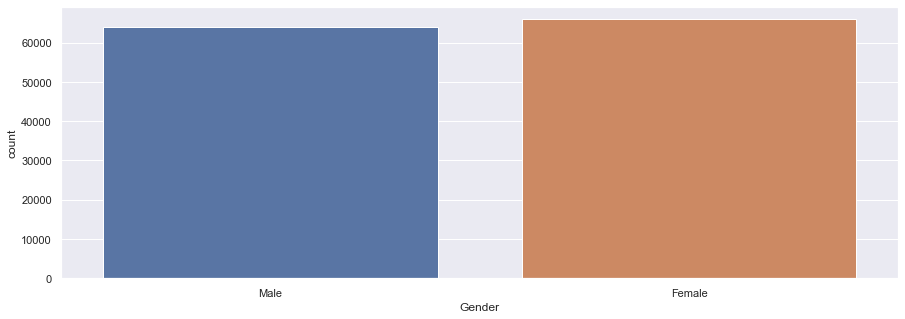

In [18]:
plt.figure(figsize =(15,5))
sns.countplot(x = 'Gender', data = df)

<strong>AGE</strong>

In [19]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


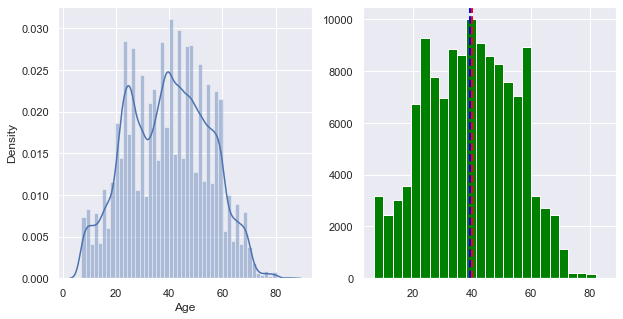

In [20]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
plt.hist(df['Age'], color='green', bins =25)
plt.axvline(df['Age'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df['Age'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

<strong>CUSTOMER TYPE</strong>

In [21]:
df['Customer Type'].value_counts()

Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

In [22]:
df['Customer Type'].value_counts(normalize = True)*100

Returning     81.690791
First-time    18.309209
Name: Customer Type, dtype: float64

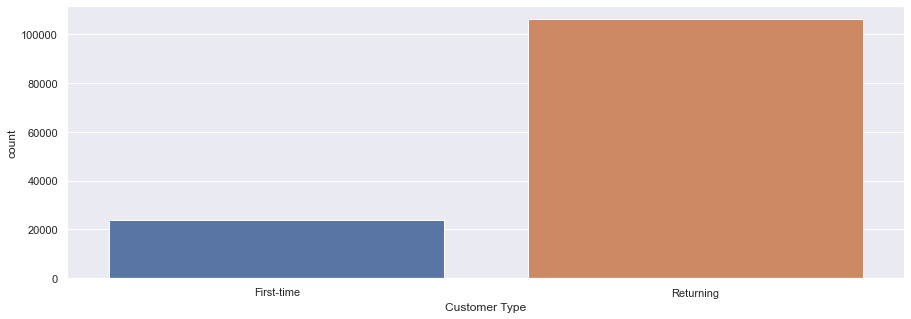

In [23]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'Customer Type', data = df)

<strong>TYPE OF TRAVEL</strong>

In [24]:
df['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

In [25]:
df['Type of Travel'].value_counts(normalize = True)*100

Business    69.058362
Personal    30.941638
Name: Type of Travel, dtype: float64

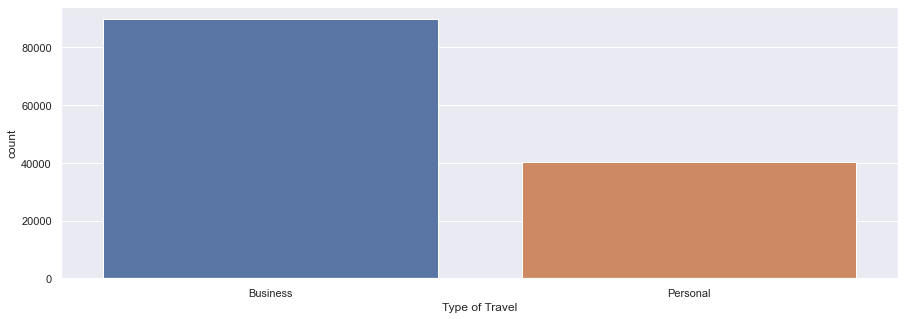

In [26]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'Type of Travel', data = df)

<strong>CLASS</strong>

In [27]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [28]:
df['Class'].value_counts()

Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

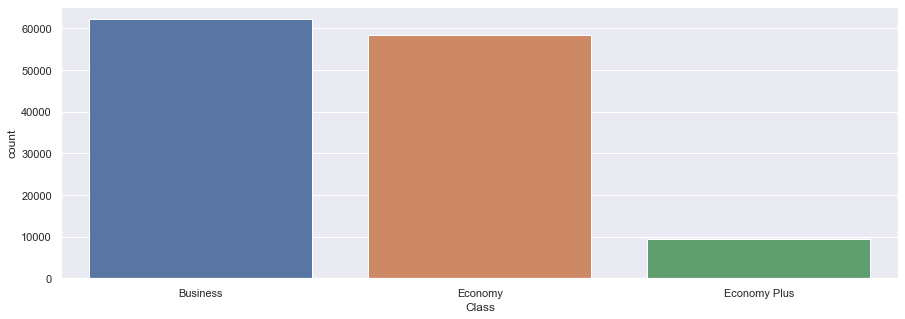

In [29]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'Class', data = df)

<strong>FLIGHT DISTANCE</strong>

In [30]:
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


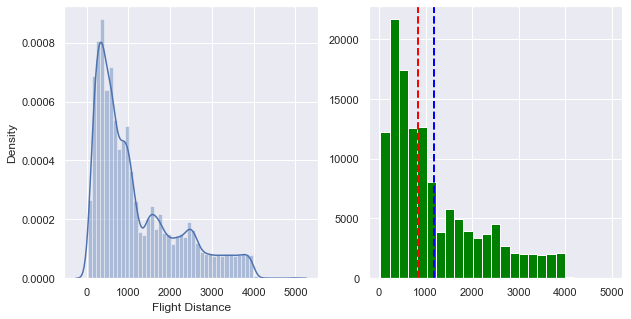

In [31]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(df['Flight Distance'])

plt.subplot(1,2,2)
plt.hist(df['Flight Distance'], color='green', bins =25)
plt.axvline(df['Flight Distance'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df['Flight Distance'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

<strong>DEPARTURE DELAY</strong>

In [32]:
df['Departure Delay'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64

In [33]:
df['Departure Delay'].unique()

array([   2,   26,    0,   13,   20,   16,   68,    4,   12,    6,   22,
         23,   59,   30,   29,   40,    1,   19,  151,    7,   10,  324,
         50,   45,  254,   72,  101,   18,   27,   96,   60,  104,   32,
         11,  183,   38,    3,  103,   88,   42,   54,  115,   56,  265,
         66,  117,   58,   41,  166,   44,   55,   49,  134,   52,   31,
         36,   15,   39,   95,  128,   21,   65,   17,    9,   25,  192,
         14,   82,  116,   35,  193,   51,   80,  158,   92,  165,   74,
         43,  123,   62,    5,   33,   34,   70,   48,   24,   63,   37,
         61,   47,    8,   28,  112,   46,  212,   78,   71,  102,  175,
         57,  127,  161,  195,  168,   81,   93,   98,   73,  200,  140,
        423,  291,  108,  244,  146,  124,  176,  100,  135,   75,   69,
        164,   79,   84,  184,   83,   67,  109,  118,   86,  131,  133,
        137,   53,  815,   94,   77,   85,  264,  267,   76,  174,  111,
        110,  145,  227,   64,  180,  240,  105,  1

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


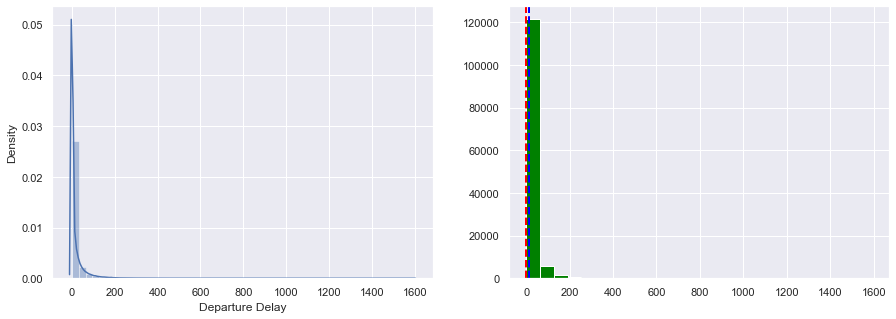

In [34]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['Departure Delay'])

plt.subplot(1,2,2)
plt.hist(df['Departure Delay'], color='green', bins =25)
plt.axvline(df['Departure Delay'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df['Departure Delay'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

<strong>ARRIVAL DELAY</strong>

In [35]:
df['Arrival Delay'].describe()

count    129880.000000
mean         15.045465
std          38.416353
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

C:\Users\Emack\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


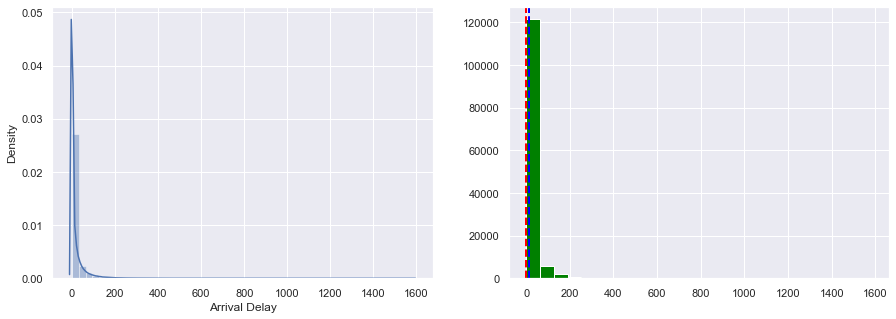

In [36]:
# Sub plot

# plt.subplot(#Total number of rows, total number of columns, plot number)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(df['Arrival Delay'])

plt.subplot(1,2,2)
plt.hist(df['Arrival Delay'], color='green', bins =25)
plt.axvline(df['Arrival Delay'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df['Arrival Delay'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

<strong>SACTISFACTORY LEVEL OF CUSTOMERS FROM 1-5,  0 is unacceptable</strong>

<AxesSubplot:xlabel='Baggage Handling', ylabel='count'>

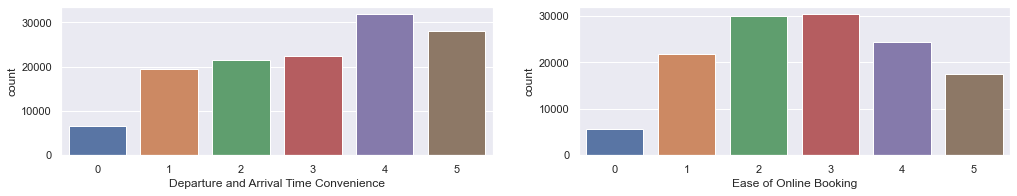

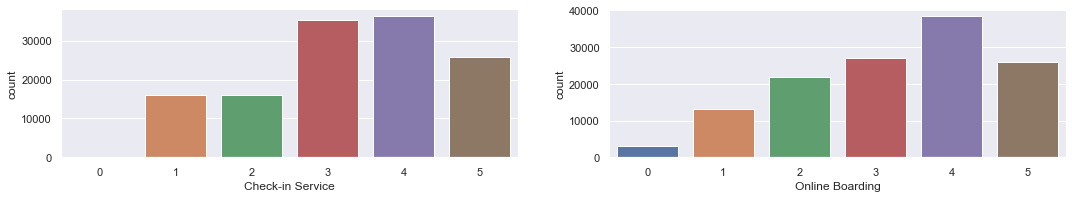

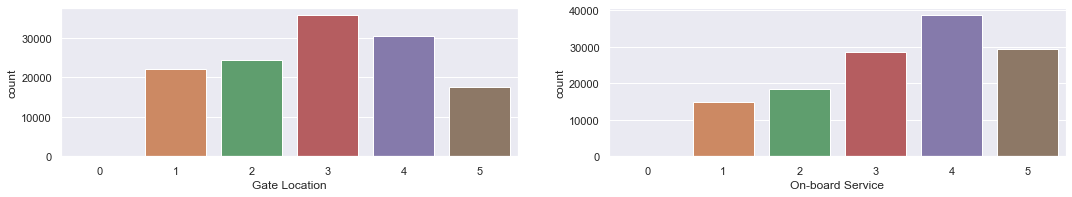

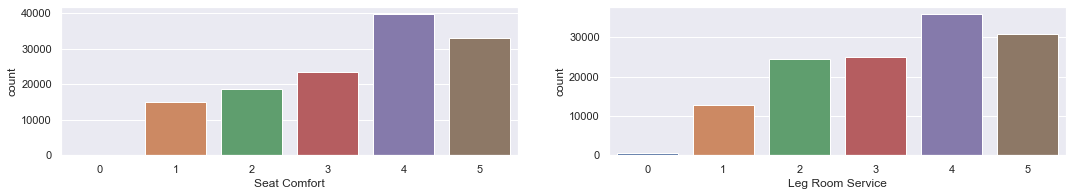

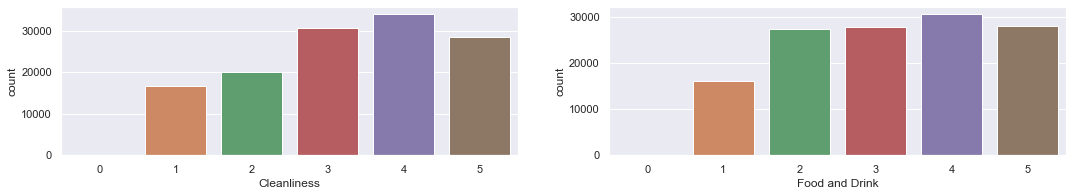

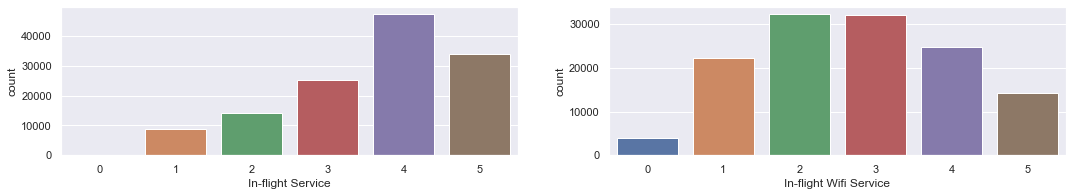

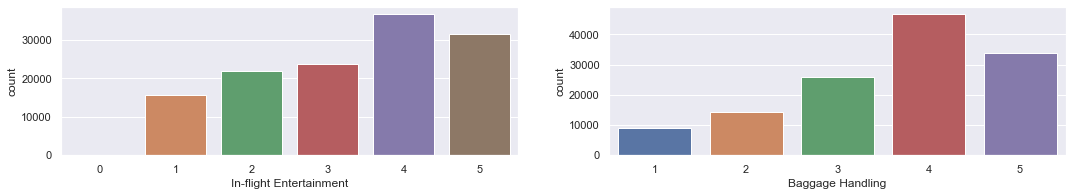

In [37]:
plt.figure(figsize = (17,6))
plt.subplot(2,2,1)
sns.countplot(x = 'Departure and Arrival Time Convenience', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Ease of Online Booking', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'Check-in Service', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Online Boarding', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'Gate Location', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'On-board Service', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'Seat Comfort', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Leg Room Service', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'Cleanliness', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Food and Drink', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'In-flight Service', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'In-flight Wifi Service', data = df)
plt.figure(figsize = (18,6))
plt.subplot(2,2,1)
sns.countplot(x = 'In-flight Entertainment', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'Baggage Handling', data = df)


<strong>OVER ALL SACTISFACTION</strong>

In [38]:
df['Satisfaction']

0         Neutral or Dissatisfied
1                       Satisfied
2                       Satisfied
3                       Satisfied
4                       Satisfied
                   ...           
129875    Neutral or Dissatisfied
129876    Neutral or Dissatisfied
129877    Neutral or Dissatisfied
129878                  Satisfied
129879    Neutral or Dissatisfied
Name: Satisfaction, Length: 129880, dtype: object

In [39]:
df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

In [40]:
df['Satisfaction'].value_counts(normalize = True)*100

Neutral or Dissatisfied    56.553742
Satisfied                  43.446258
Name: Satisfaction, dtype: float64

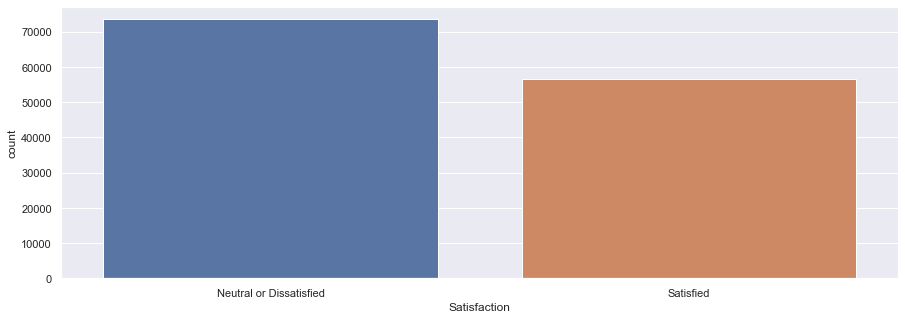

In [41]:
plt.figure(figsize =(15,5))
chart =sns.countplot(x = 'Satisfaction', data = df)

### Bivariate Descriptive Analysis

In [42]:
df.head()
df.drop("ID", axis=1, inplace=True)

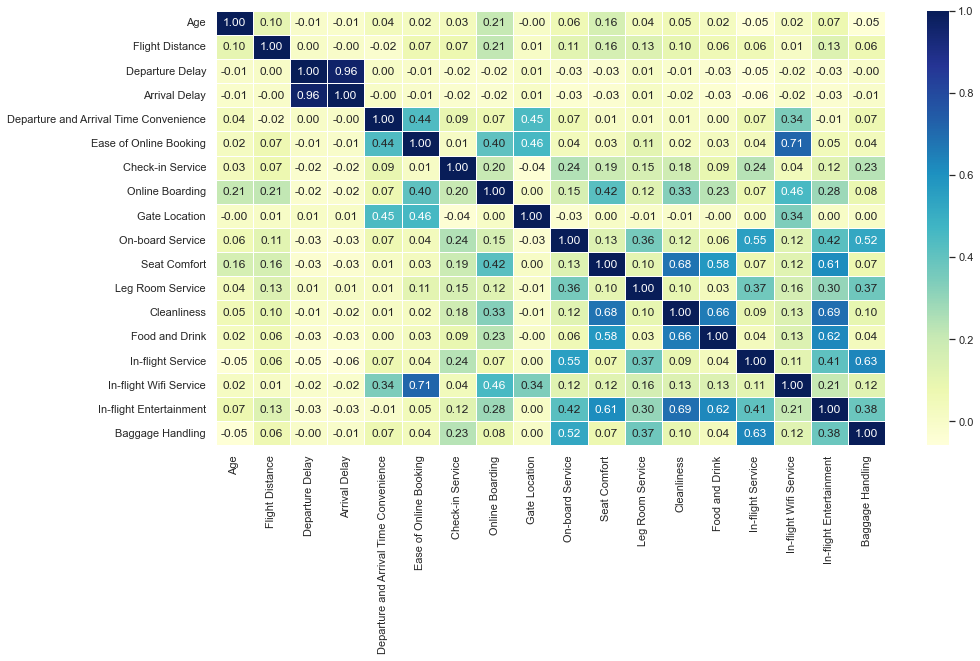

In [43]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize =(15, 8))
ax =sns.heatmap(corr_matrix, 
                annot =True, 
                linewidth =0.5,
               fmt=".2f",
               cmap ="YlGnBu")

In [44]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [45]:
df[['Gender', 'Age']]

,Gender,Age
0,Male,48
1,Female,35
2,Male,41
3,Male,50
4,Female,49
...,...,...
129875,Male,28
129876,Male,41
129877,Male,42
129878,Male,50


<AxesSubplot:title={'center':'Gender and Satisfaction'}, xlabel='Gender', ylabel='count'>

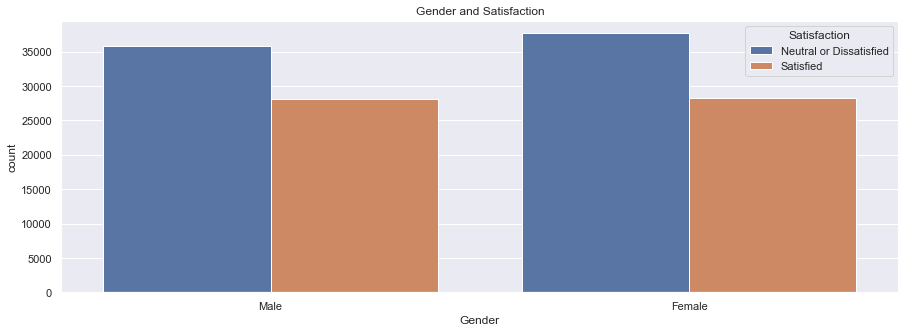

In [46]:
plt.figure(figsize =(15,5))
plt.title("Gender and Satisfaction")
sns.countplot(x ="Gender",hue ="Satisfaction", data = df)


<AxesSubplot:title={'center':'Gender and Customer Type'}, xlabel='Gender', ylabel='count'>

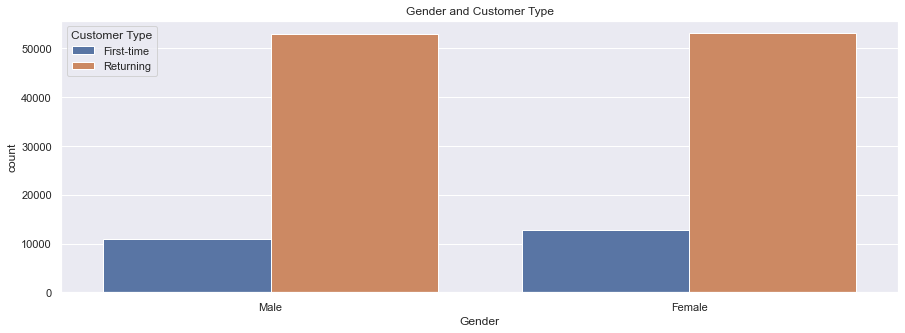

In [47]:
plt.figure(figsize =(15,5))
plt.title("Gender and Customer Type")
sns.countplot(x ="Gender",hue ="Customer Type", data = df)

<AxesSubplot:title={'center':'Gender and Type of Travel'}, xlabel='Gender', ylabel='count'>

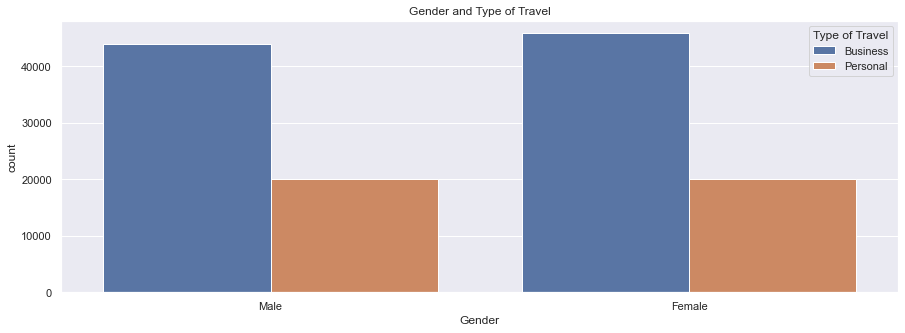

In [48]:
plt.figure(figsize =(15,5))
plt.title("Gender and Type of Travel")
sns.countplot(x ="Gender",hue ="Type of Travel", data = df)

<AxesSubplot:title={'center':'Gender and Class'}, xlabel='Gender', ylabel='count'>

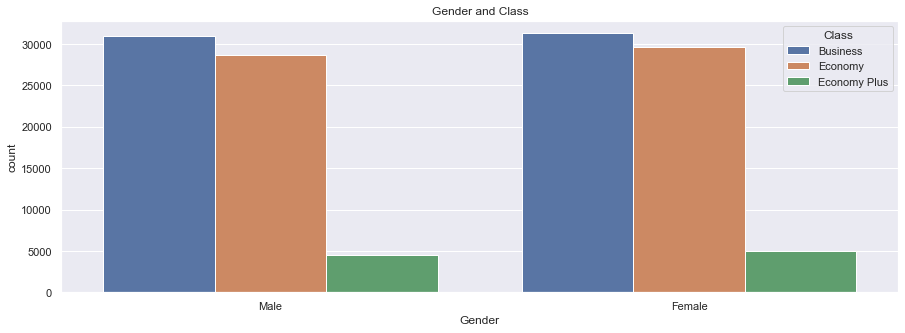

In [49]:
plt.figure(figsize =(15,5))
plt.title("Gender and Class")
sns.countplot(x ="Gender",hue ="Class", data = df)

<AxesSubplot:title={'center':'Customer Type and sactisfaction'}, xlabel='Customer Type', ylabel='count'>

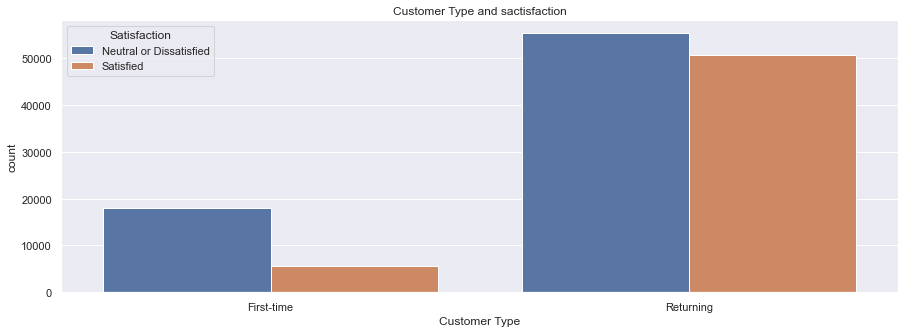

In [50]:
plt.figure(figsize =(15,5))
plt.title("Customer Type and sactisfaction")
sns.countplot(x ="Customer Type",hue ="Satisfaction", data = df)

<AxesSubplot:title={'center':'Customer Type and Type of Travel'}, xlabel='Customer Type', ylabel='count'>

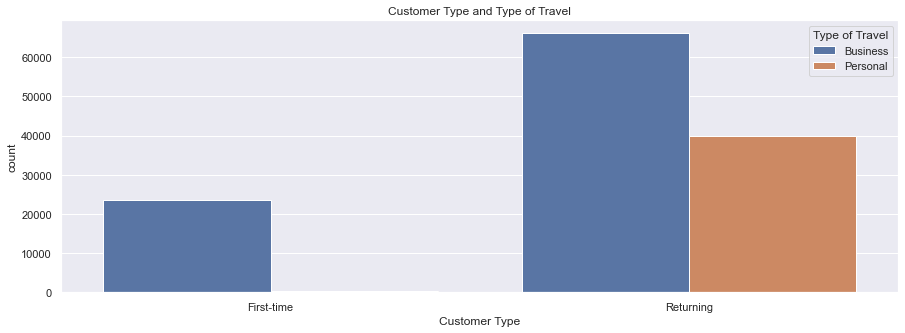

In [51]:
plt.figure(figsize =(15,5))
plt.title("Customer Type and Type of Travel")
sns.countplot(x ="Customer Type",hue ="Type of Travel", data = df)

<AxesSubplot:title={'center':'Customer Type and Class '}, xlabel='Customer Type', ylabel='count'>

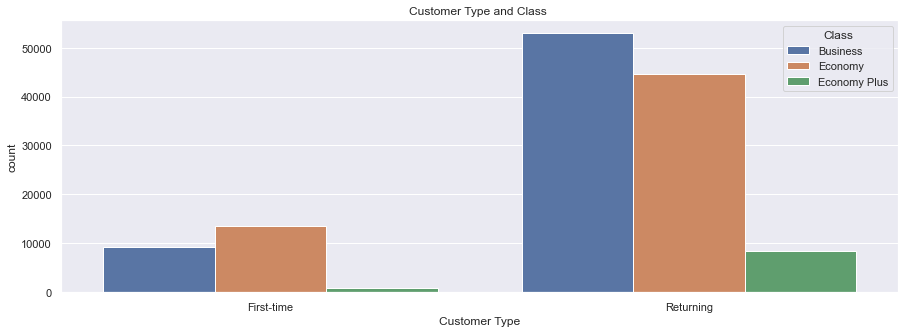

In [52]:
plt.figure(figsize =(15,5))
plt.title("Customer Type and Class ")
sns.countplot(x ="Customer Type",hue ="Class", data = df)


<AxesSubplot:title={'center':'Type of Travel and Class'}, xlabel='Type of Travel', ylabel='count'>

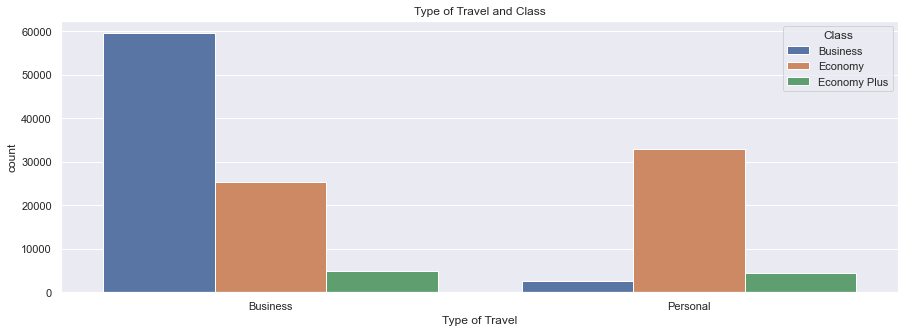

In [53]:
plt.figure(figsize =(15,5))
plt.title("Type of Travel and Class")
sns.countplot(x ="Type of Travel",hue ="Class", data = df)

<AxesSubplot:title={'center':'Type of Travel and Satisfaction'}, xlabel='Type of Travel', ylabel='count'>

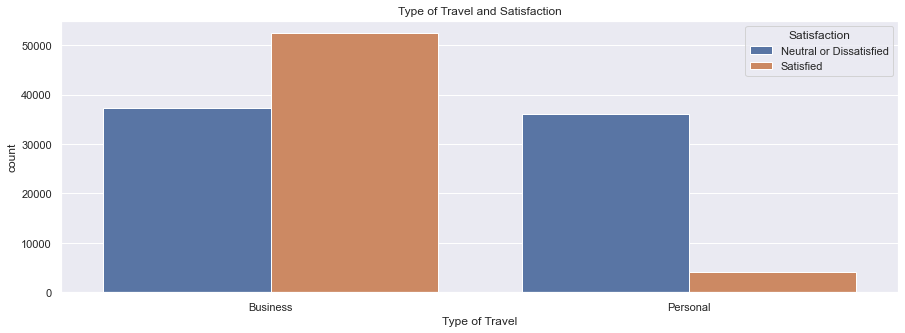

In [54]:
plt.figure(figsize =(15,5))
plt.title("Type of Travel and Satisfaction")
sns.countplot(x ="Type of Travel",hue ="Satisfaction", data = df)      

<AxesSubplot:title={'center':'Class and Satisfaction'}, xlabel='Class', ylabel='count'>

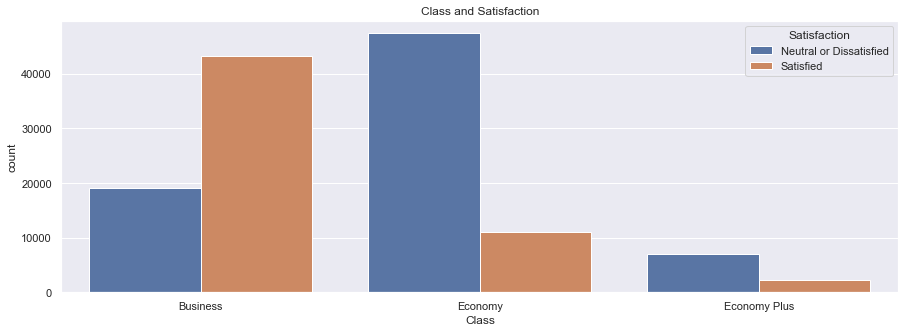

In [55]:
plt.figure(figsize =(15,5))
plt.title("Class and Satisfaction")
sns.countplot(x ="Class",hue ="Satisfaction", data = df) 

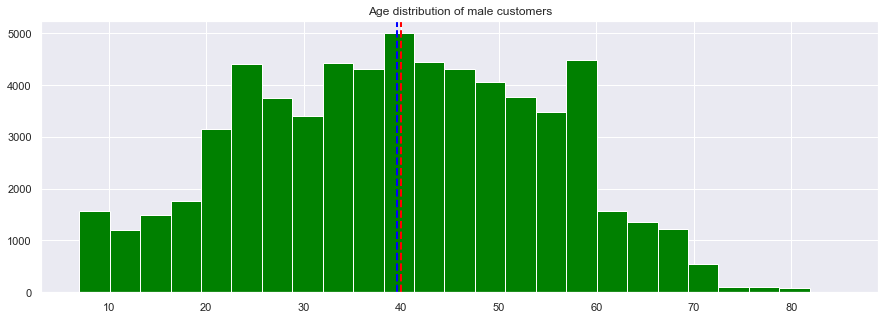

In [61]:
plt.figure(figsize =(15,5))
plt.title("Age distribution of Male customers")
plt.hist(df[df['Gender']=='Male']['Age'], color='green', bins =25)
plt.axvline(df[df['Gender']=='Male']['Age'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df[df['Gender']=='Male']['Age'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

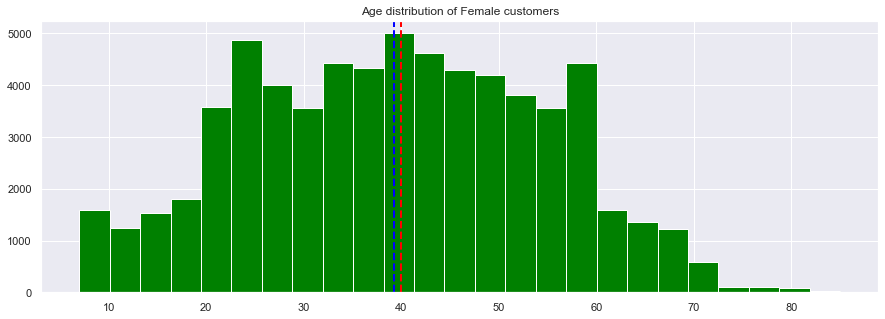

In [62]:
plt.figure(figsize =(15,5))
plt.title("Age distribution of Female customers")
plt.hist(df[df['Gender']=='Female']['Age'], color='green', bins =25)
plt.axvline(df[df['Gender']=='Female']['Age'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df[df['Gender']=='Female']['Age'].median(), color ='red', linestyle = 'dashed', linewidth = 2)

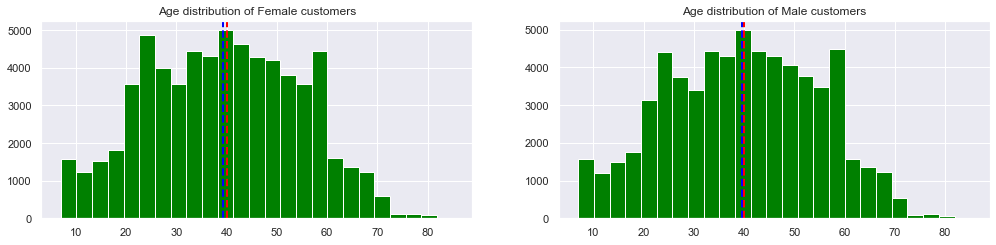

In [67]:
plt.figure(figsize = (17,8))
plt.subplot(2,2,1)
plt.title("Age distribution of Female customers")
plt.hist(df[df['Gender']=='Female']['Age'], color='green', bins =25)
plt.axvline(df[df['Gender']=='Female']['Age'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df[df['Gender']=='Female']['Age'].median(), color ='red', linestyle = 'dashed', linewidth = 2)
plt.subplot(2,2,2)
plt.title("Age distribution of Male customers")
plt.hist(df[df['Gender']=='Male']['Age'], color='green', bins =25)
plt.axvline(df[df['Gender']=='Male']['Age'].mean(), color ='blue', linestyle ='dashed',linewidth=2) 
plt.axvline(df[df['Gender']=='Male']['Age'].median(), color ='red', linestyle = 'dashed', linewidth = 2)